# 什么是 PyTorch ?
PyTorch是一个python库，它主要提供了两个高级功能：

*   GPU加速的张量计算
*   构建在反向自动求导系统上的深度神经网络


## 1.定义数据
一般定义数据使用torch.Tensor ， tensor的意思是张量，是数字各种形式的总称，可以是一个数、一维数组（向量）、二维数组（矩阵）、多维数组（张量）

In [1]:
import torch

# 可以是一个数
x = torch.tensor(666)
print(x)

tensor(666)


In [2]:
# 可以是一维数组（向量）
x = torch.tensor([1,2,3,4,5,6])
print(x)

tensor([1, 2, 3, 4, 5, 6])


In [3]:
# 可以是二维数组（矩阵）
x = torch.ones(2,3)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [4]:
# 可以是任意维度的数组（张量）
x = torch.ones(2,3,4)
print(x)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


## 2.创建Tensor的多种方法
ones：矩阵元素全1

zeros：矩阵元素全0

eye：对角线为1，其余为0

arange：限定范围，指定步长

linspace：限定范围，指定数量

rand：随机初始化

randn：采样自N(0,1)

normal：指定参数的正态分布

uniform：均匀分布

randperm：不重复的重排采样

> 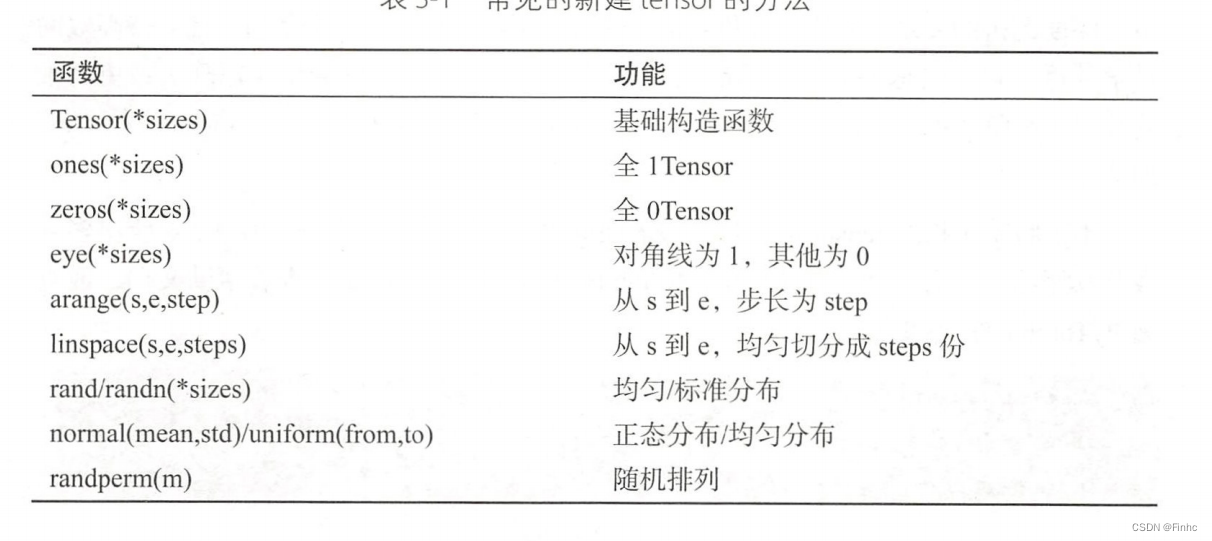
> ——[torch 中的 uniform 具体用法](https://blog.csdn.net/qq_39665216/article/details/126217031)

In [5]:
# 创建一个空张量
x = torch.empty(5,3)
print(x)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.4013e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.4013e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [6]:
# 创建一个随机初始化的张量
x = torch.rand(5,3)
print(x)

tensor([[0.6738, 0.0760, 0.4035],
        [0.2712, 0.3597, 0.0555],
        [0.6246, 0.8904, 0.6894],
        [0.6660, 0.6835, 0.1439],
        [0.7407, 0.8326, 0.5381]])


In [7]:
# 创建一个全0的张量，里面的数据类型为 long
x = torch.zeros(5,3,dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [8]:
# 基于现有的tensor，创建一个新tensor，
# 从而可以利用原有的tensor的dtype，device，size之类的属性信息
y = x.new_ones(5,3)   #tensor new_* 方法，利用原来tensor的dtype，device
print(y)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])


In [9]:
z = torch.randn_like(x, dtype=torch.float)    # 利用原来的tensor的大小，但是重新定义了dtype
print(z)

tensor([[ 1.1417, -0.5347, -0.3901],
        [-0.5085,  1.2600, -0.5911],
        [-1.1299,  0.5871,  0.5502],
        [ 0.4847,  0.7262, -0.2657],
        [-0.1029, -0.6111, -0.9414]])


## 3.定义操作
凡是用Tensor进行各种运算的，都是Function

最终，还是需要用Tensor来进行计算的，计算无非是

* 基本运算，加减乘除，求幂求余
* 布尔运算，大于小于，最大最小
* 线性运算，矩阵乘法，求模，求行列式

**基本运算包括**：

1.abs/sqrt/div/exp/fmod/log/pow     绝对值/平方根/除法/指数/求余/求幂

2.cos/sin/asin/atan2/cosh     三角函数

3.ceil/round/floor/trunc        上取整/四舍五入/下取整/只保留整数部分

**布尔运算包括**：

1.gt/lt/ge/le/eq/ne        大于/小于/大于等于/小于等于/等于/不等于

2.topk        最大的k个数

3.sort        排序

4.max/min       比较两个tensor的最大值和最小值

**线性计算包括**：

1.trace    对角线元素之和（矩阵的迹）

2.diag    对角线元素

3.triu/tril    矩阵的上三角/下三角，可指定偏移量

4.mm/bmm    矩阵乘法，batch的矩阵乘法

5.addmm/addbmm/addmv    矩阵运算

6.t    转置

7.dot/cross  内积/外积

8.inverse    求逆运算

9.svd    奇异值分解

> [pytorch中的逐元素、归并操作、比较以及线性代数](https://blog.csdn.net/weixin_38664232/article/details/104628516)

In [10]:
# 创建一个 2x4 的tensor
m = torch.Tensor([[2, 5, 3, 7],
          [4, 2, 1, 9]])

print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [11]:
# 返回 m 中元素的数量
print(m.numel())

8


In [12]:
# 返回 第0行，第2列的数
print(m[0][2])

tensor(3.)


> **切片操作**
>
> Python一个语法糖：负数下标索引，即：index可以取为负数，当其为-n时，对倒数第n个元素进行索引。
>
> 简单切片：a[start:stop] 前闭后开
>
> 扩展切片：a[start:stop:step] 从start对应的位置出发，以step为步长索引序列，直至越过stop对应的位置，且不包括stop本身
>
> ——[[Python]切片完全指南(语法篇) ](https://zhuanlan.zhihu.com/p/79541418)

In [13]:
# 返回 第1列的全部元素
print(m[:, 1])

tensor([5., 2.])


In [14]:
# 返回 第0行的全部元素
print(m[0, :])

tensor([2., 5., 3., 7.])


In [30]:
# Create tensor of numbers from 1 to 5
# 注意这里结果是1到4，没有5
v = torch.arange(1, 5)

print(v)

tensor([1, 2, 3, 4])


## 4.矩阵运算

**矩阵乘法**

@表示常规的数学上定义的矩阵相乘

*表示两个矩阵对应位置处的两个元素相乘

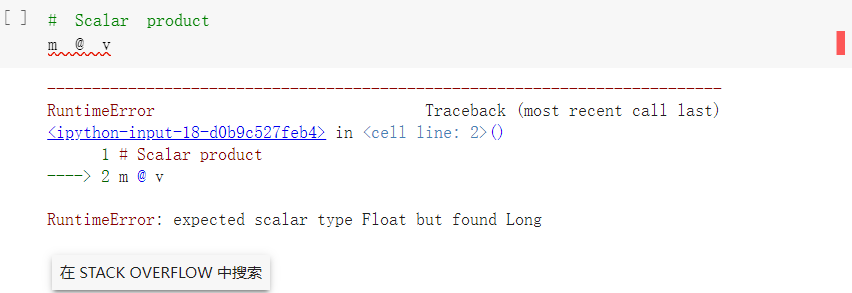

根据报错可知:预期的标量类型 Float 但发现 Long

In [31]:
print('m: ', type(m), m.type(), sep=' -- ')
print('v: ', type(v), v.type(), sep=' -- ', end='\n\n')

# 将v转换为与m相同的类型，该方法不成功
m.type_as(v)
print(m.type())
print(v.type(), end='\n\n')

v = v.type(torch.FloatTensor)
print(m.type())
print(v.type(), end='\n\n')

m:  -- <class 'torch.Tensor'> -- torch.FloatTensor
v:  -- <class 'torch.Tensor'> -- torch.LongTensor

torch.FloatTensor
torch.LongTensor

torch.FloatTensor
torch.FloatTensor



In [32]:
# Scalar product
m @ v

tensor([49., 47.])

In [33]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [34]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.2721, 5.8003, 3.1826, 7.5430],
        [4.1821, 2.1571, 1.4353, 9.0219]])

In [35]:
# 转置，由 2x4 变为 4x2
print(m.t())

# 使用 transpose 也可以达到相同的效果，具体使用方法可以百度
print(m.transpose(0, 1))

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])
tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])


In [36]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20)

tensor([3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
        5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
        7.7368, 8.0000])

## 5.画图

> x：表示要绘制直方图的数据，可以是一个一维数组或列表。
>
> bins：可选参数，表示直方图的箱数。默认为10。
>
> [Matplotlib 直方图 ](https://www.runoob.com/matplotlib/matplotlib-hist.html)

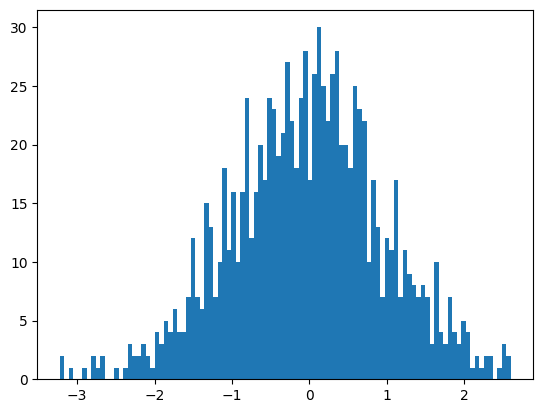

In [37]:
from matplotlib import pyplot as plt

# matlabplotlib 只能显示numpy类型的数据，下面展示了转换数据类型，然后显示
# 注意 randn 是生成均值为 0， 方差为 1 的随机数
# 下面是生成 1000 个随机数，并按照 100 个 bin 统计直方图
plt.hist(torch.randn(1000).numpy(), 100);

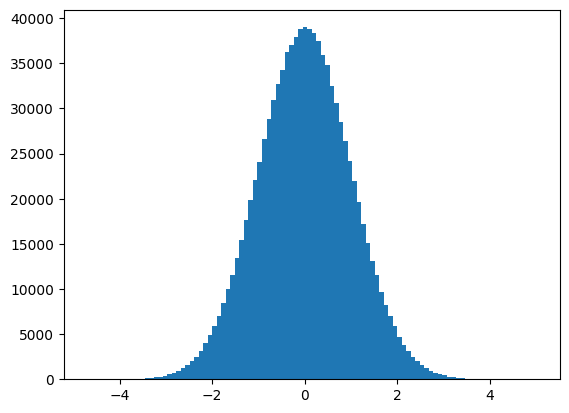

In [38]:
# 当数据非常非常多的时候，正态分布会体现的非常明显
plt.hist(torch.randn(10**6).numpy(), 100);

## 6.张量拼接

> 函数目的： 在给定维度上对输入的张量序列seq 进行连接操作。
>
> outputs = torch.cat(inputs, dim=?) → Tensor
参数
>
> inputs : 待连接的张量序列，可以是任意相同Tensor类型的python 序列
>
> dim : 选择的扩维, 必须在0到len(inputs[0])之间，沿着此维连接张量序列。
> [torch.cat()函数的官方解释，详解以及例子](https://blog.csdn.net/xinjieyuan/article/details/105208352)

In [39]:
# 创建两个 1x4 的tensor
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])

# 在 0 方向拼接 （即在 Y 方各上拼接）, 会得到 2x4 的矩阵
print( torch.cat((a,b), 0))

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])


In [40]:
# 在 1 方向拼接 （即在 X 方各上拼接）, 会得到 1x8 的矩阵
print( torch.cat((a,b), 1))

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])
